In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### 1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

305 354 379 124


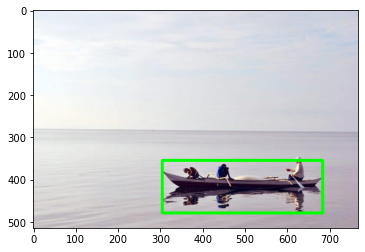

In [2]:
img = cv.imread("boat.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
x,y,w,h = cv.boundingRect(mask)
print(x, y, w, h)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(img)

#### 2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).
- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [3]:
img = cv.imread("leaf.jfif")
cv.namedWindow("image")
def nothing(x): None
    
cv.createTrackbar('erosion', 'image', 0, 10, nothing)

img2 = img.copy()
prev_e = prev_d = prev_o = prev_c = 0

while(1):
    cv.imshow('image',img2)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    e = cv.getTrackbarPos('erosion', 'image')
    
    if e != prev_e:
        img2 = cv.erode(img, (1,1), iterations = e)
        prev_e = e

    
cv.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


#### 4. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [4]:
# ref: https://stackoverflow.com/questions/44588279/find-and-draw-the-largest-contour-in-opencv-on-a-specific-color-python
def maxContour(contours):
    cnt_list = np.zeros(len(contours))
    for i in range(0,len(contours)):
        cnt_list[i] = cv.contourArea(contours[i])

    max_value = np.amax(cnt_list)
    max_index = np.argmax(cnt_list)
    cnt = contours[max_index]

    return cnt, max_index

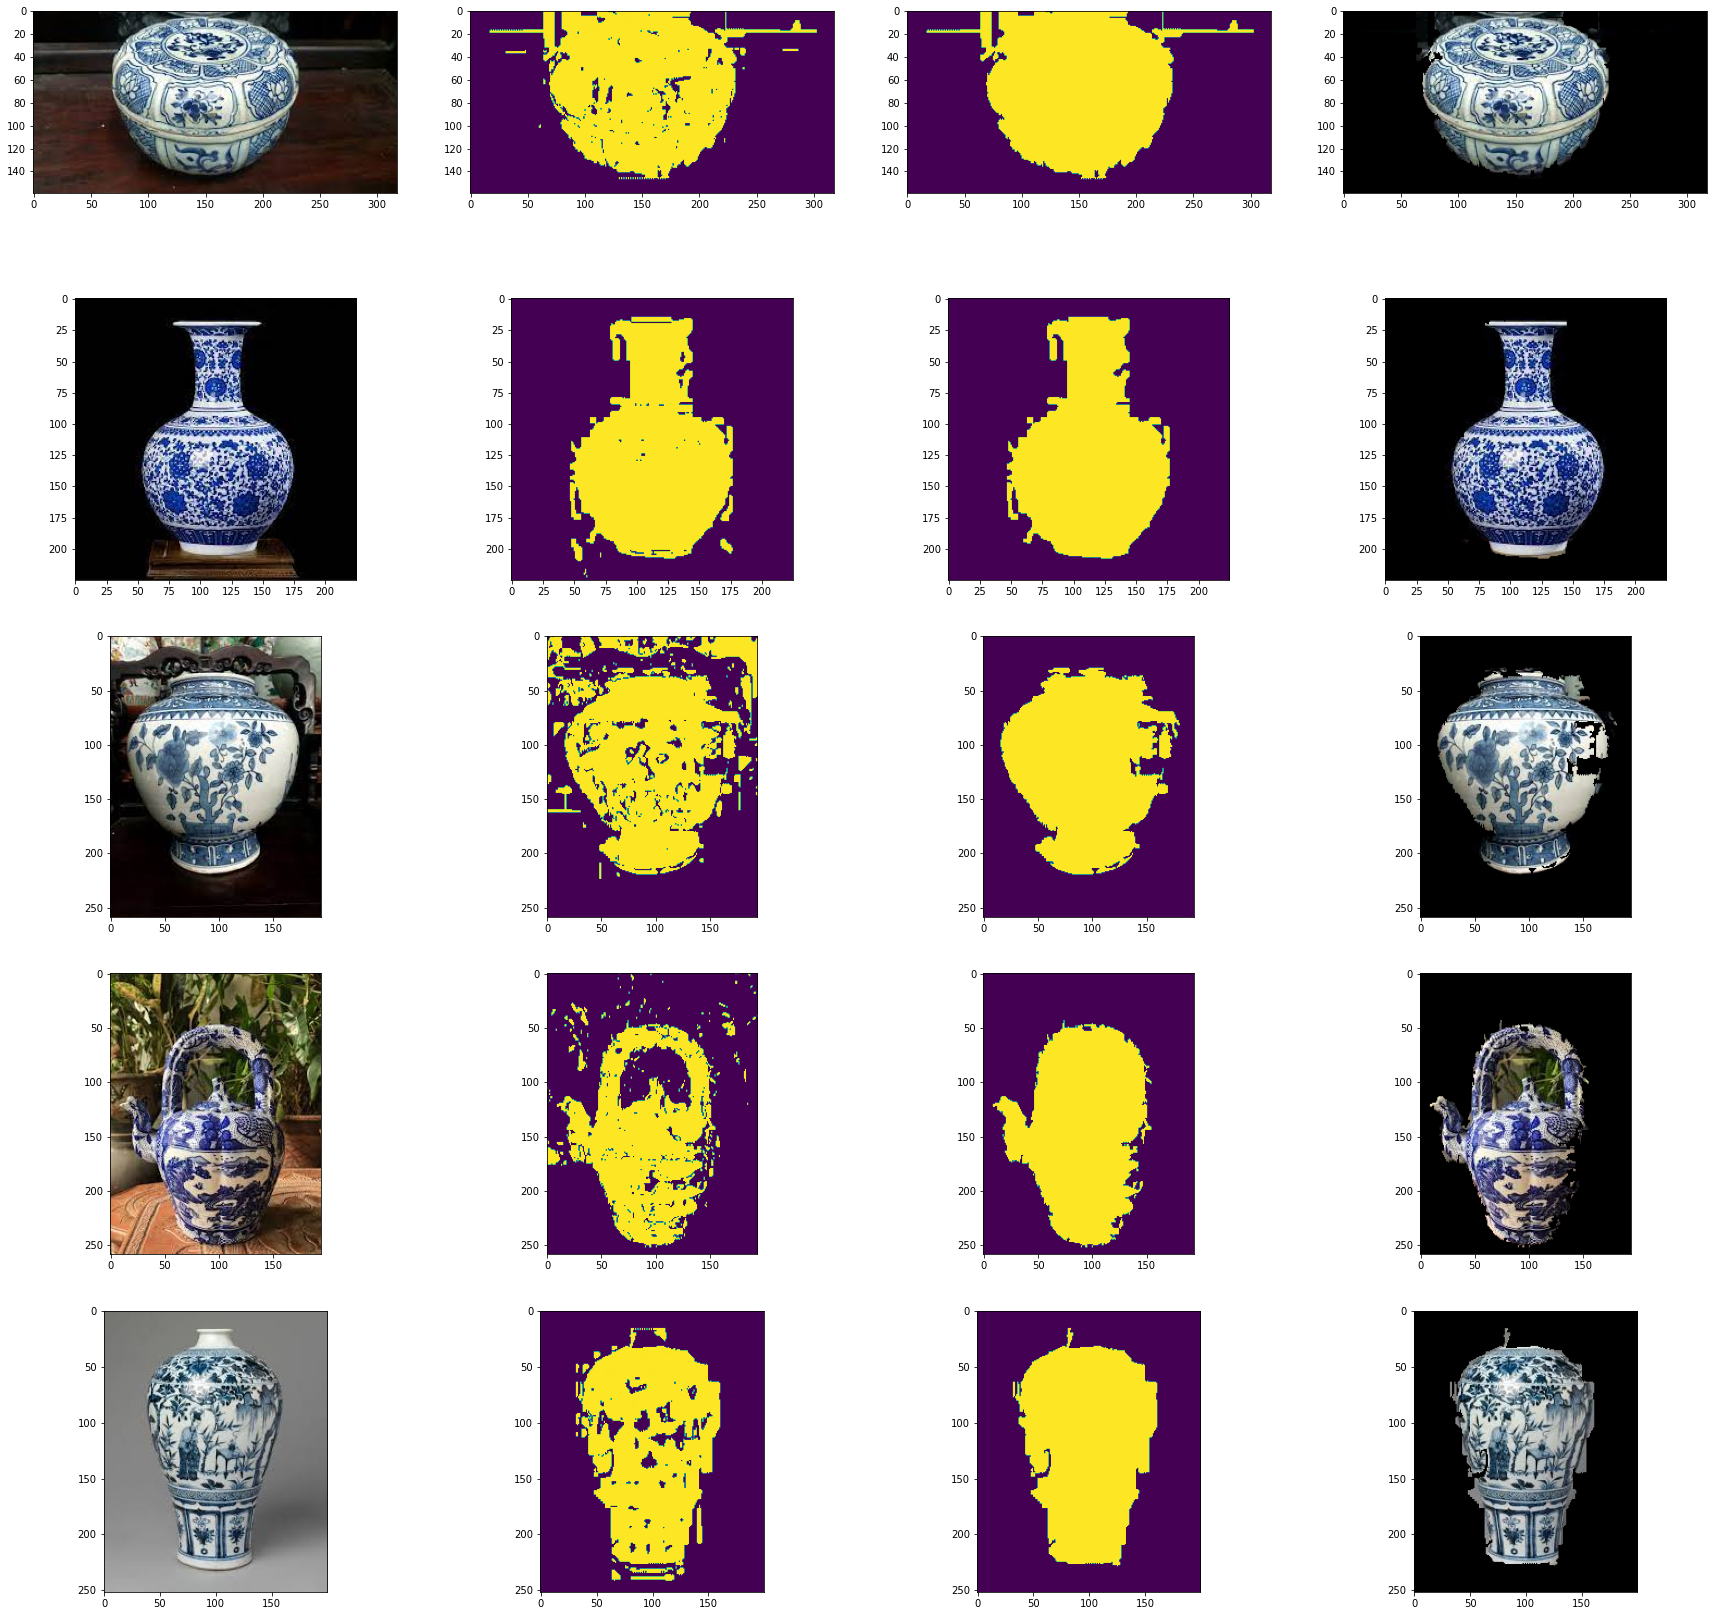

In [5]:
img = []
final_mask_list = []
largest_contour_mask_list = []
img.append(cv.imread("porcelain1.jfif"))
img.append(cv.imread("porcelain2.jfif"))
img.append(cv.imread("porcelain3.jfif"))
img.append(cv.imread("porcelain4.jfif"))
img.append(cv.imread("porcelain5.jfif"))

lower_blue, upper_blue = (90,0,0),(160,255,255)
lower_white, upper_white = (0,15,100),(100,65,255)

for i in range (5):
    image = img[i].copy()
    image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    blue_mask = cv.inRange(image, lower_blue, upper_blue)
    white_mask = cv.inRange(image, lower_white, upper_white)
    combined_mask = blue_mask + white_mask
    combined_mask = cv.dilate(combined_mask, (2,2), 1)
    final_mask_list.append(combined_mask)
    
    if (int(cv.__version__[0]) > 3):
        contours, hierarchy = cv.findContours(combined_mask, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
    else:
        _, contours, hierarchy = cv.findContours(combined_mask, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
    largest_contour, largest_contour_index = maxContour(contours)
    final_mask = np.zeros(combined_mask.shape, dtype = np.uint8)
    cv.drawContours(final_mask, contours, largest_contour_index, (255,255,255), -1)
    largest_contour_mask_list.append(final_mask)
    
f, ax =  plt.subplots(5,4,figsize=(30,30))
for i in range (5):
    img[i] = cv.cvtColor(img[i], cv.COLOR_BGR2RGB)
    img_roi =cv.bitwise_and(img[i],img[i],mask = largest_contour_mask_list[i])
    ax[i][0].imshow(img[i])
    ax[i][1].imshow(final_mask_list[i])
    ax[i][2].imshow(largest_contour_mask_list[i])
    ax[i][3].imshow(img_roi)